In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.compose import ColumnTransformer


# DATA EXPLORATION

In [3]:
df_explore = pd.read_csv('../data/processed/dataset.csv').copy()
df_explore.head()

,Unnamed: 0,sales_agent,account,opportunity_status,manager,regional_office,sector,revenue,office_location,product,series,sales_price,duration,won,close_value
0,0,moses frase,cancity,completed,dustin brinkmann,central,retail,718.62,united states,gtx plus basic,gtx,1096.0,132.0,1,1054.0
1,1,darcel schlecht,isdom,completed,melvin marxen,central,medical,3178.24,united states,gtxpro,NaN,NaN,137.0,1,4514.0
2,2,darcel schlecht,cancity,completed,melvin marxen,central,retail,718.62,united states,mg special,mg,55.0,133.0,1,50.0
3,3,moses frase,codehow,completed,dustin brinkmann,central,software,2714.90,united states,gtx basic,gtx,550.0,135.0,1,588.0
4,4,zane levy,hatfan,completed,summer sewald,west,services,792.46,united states,gtx basic,gtx,550.0,128.0,1,517.0


In [4]:
df_explore['opportunity_status'].unique()

array(['completed', 'in_progress', 'initial'], dtype=object)

In [5]:
df_explore[df_explore['opportunity_status'] == 'initial']

,Unnamed: 0,sales_agent,account,opportunity_status,manager,regional_office,sector,revenue,office_location,product,series,sales_price,duration,won,close_value
8300,8300,anna snelling,green-plus,initial,dustin brinkmann,central,services,692.19,united states,gtx basic,gtx,550.0,NaN,0,NaN
8301,8301,anna snelling,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,gtx basic,gtx,550.0,NaN,0,NaN
8302,8302,anna snelling,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,gtx basic,gtx,550.0,NaN,0,NaN
8303,8303,anna snelling,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,gtx basic,gtx,550.0,NaN,0,NaN
8304,8304,anna snelling,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,gtx basic,gtx,550.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,8795,versie hillebrand,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,mg advanced,mg,3393.0,NaN,0,NaN
8796,8796,versie hillebrand,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,mg advanced,mg,3393.0,NaN,0,NaN
8797,8797,versie hillebrand,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,mg advanced,mg,3393.0,NaN,0,NaN
8798,8798,versie hillebrand,NaN,initial,dustin brinkmann,central,NaN,NaN,NaN,mg advanced,mg,3393.0,NaN,0,NaN


In [6]:
df_explore[df_explore['opportunity_status'] == 'in_progress']

,Unnamed: 0,sales_agent,account,opportunity_status,manager,regional_office,sector,revenue,office_location,product,series,sales_price,duration,won,close_value
9,9,james ascencio,NaN,in_progress,summer sewald,west,NaN,NaN,NaN,mg advanced,mg,3393.0,NaN,0,NaN
25,25,maureen marcano,ganjaflex,in_progress,summer sewald,west,retail,5158.71,japan,mg advanced,mg,3393.0,NaN,0,NaN
42,42,kami bicknell,NaN,in_progress,summer sewald,west,NaN,NaN,NaN,gtx basic,gtx,550.0,NaN,0,NaN
44,44,cassey cress,NaN,in_progress,rocco neubert,east,NaN,NaN,NaN,gtxpro,NaN,NaN,NaN,0,NaN
56,56,kami bicknell,NaN,in_progress,summer sewald,west,NaN,NaN,NaN,gtx plus basic,gtx,1096.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8277,8277,boris faz,NaN,in_progress,rocco neubert,east,NaN,NaN,NaN,gtxpro,NaN,NaN,NaN,0,NaN
8283,8283,hayden neloms,silis,in_progress,celia rouche,west,medical,2818.38,united states,mg special,mg,55.0,NaN,0,NaN
8285,8285,wilburn farren,NaN,in_progress,cara losch,east,NaN,NaN,NaN,gtx plus basic,gtx,1096.0,NaN,0,NaN
8286,8286,cassey cress,NaN,in_progress,rocco neubert,east,NaN,NaN,NaN,gtx plus pro,gtx,5482.0,NaN,0,NaN


In [7]:
df_explore.value_counts()

Unnamed: 0  sales_agent        account                       opportunity_status  manager           regional_office  sector              revenue  office_location  product         series  sales_price  duration  won  close_value
8299        gladys colclough   betatech                      completed           melvin marxen     central          medical             647.18   kenya            mg special      mg      55.0         2.0       1    67.0           1
0           moses frase        cancity                       completed           dustin brinkmann  central          retail              718.62   united states    gtx plus basic  gtx     1096.0       132.0     1    1054.0         1
2           darcel schlecht    cancity                       completed           melvin marxen     central          retail              718.62   united states    mg special      mg      55.0         133.0     1    50.0           1
3           moses frase        codehow                       completed           

In [8]:
df_explore['opportunity_status'].value_counts()

opportunity_status
completed      6711
in_progress    1589
initial         500
Name: count, dtype: int64

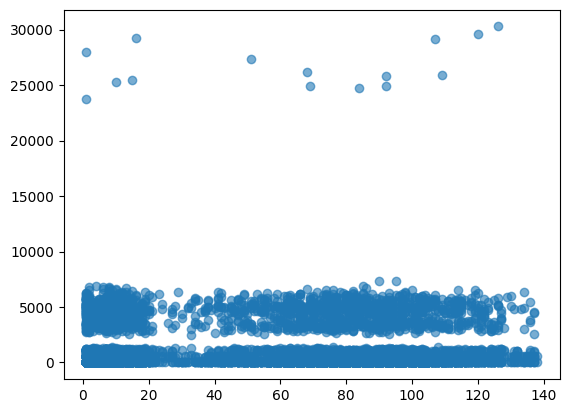

In [9]:
df_plot = df_explore[['duration', 'close_value']].dropna()
plt.scatter(df_plot['duration'], df_plot['close_value'], alpha=0.6)
plt.show()

In [10]:
df_explore['sales_agent'].value_counts()

sales_agent
darcel schlecht       747
vicki laflamme        451
anna snelling         448
kary hendrixson       438
kami bicknell         362
versie hillebrand     361
zane levy             349
cassey cress          346
jonathan berthelot    345
gladys colclough      317
lajuana vencill       311
corliss cosme         310
markita hansen        306
maureen marcano       285
marty freudenburg     281
donn cantrell         275
james ascencio        267
violet mclelland      261
moses frase           260
daniell hammack       259
niesha huffines       239
reed clapper          237
boris faz             210
cecily lampkin        203
hayden neloms         202
elease gluck          177
rosalina dieter       160
rosie papadopoulos    160
garret kinder         123
wilburn farren        110
Name: count, dtype: int64

# Cleaning data

In [11]:
# Filtering only completed deals:

df_new = df_explore[df_explore['opportunity_status'] == 'completed'].copy()

In [12]:
df_new.columns

Index(['Unnamed: 0', 'sales_agent', 'account', 'opportunity_status', 'manager',
       'regional_office', 'sector', 'revenue', 'office_location', 'product',
       'series', 'sales_price', 'duration', 'won', 'close_value'],
      dtype='object')

In [13]:
# Removing unnecessary columns:

df_clean = df_new[['sales_agent', 'sector', 'revenue', 'office_location', 'product','series','close_value']]

In [14]:
df_clean.columns

Index(['sales_agent', 'sector', 'revenue', 'office_location', 'product',
       'series', 'close_value'],
      dtype='object')

In [15]:
df_clean.shape

(6711, 7)

In [16]:
# Removing duplicates
df_clean = df_clean.drop_duplicates()

In [17]:
# Checking NaN
df_nan = df_clean[df_clean['series'].isna()]
df_nan['product'].value_counts()

product
gtxpro    998
Name: count, dtype: int64

In [18]:
# Fill NaN
df_clean = df_clean.fillna('gtx')

In [19]:
df_clean.columns

Index(['sales_agent', 'sector', 'revenue', 'office_location', 'product',
       'series', 'close_value'],
      dtype='object')

# DEFINING FEATURES

In [20]:
X = df_clean.drop('close_value', axis='columns')
y =  df_clean['close_value']

In [21]:
X.dtypes


sales_agent         object
sector              object
revenue            float64
office_location     object
product             object
series              object
dtype: object

In [22]:
X.columns

Index(['sales_agent', 'sector', 'revenue', 'office_location', 'product',
       'series'],
      dtype='object')

In [23]:
num_data = ['revenue']
cat_data = ['sales_agent', 'sector', 'office_location', 'product','series']

In [30]:
num_transformer = Pipeline([
  ('standard_scaler', RobustScaler())
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
   ('num_transformer', num_transformer, num_data),
   ('cat_transformer', cat_transformer, cat_data),
])


In [31]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
full_pipeline.fit(X, y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transformer', ...), ('cat_transformer', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# BASELINE 

In [26]:
df_won = df_clean[df_clean['close_value'] > 0]
df_baseline = df_won.groupby(['product', 'series'])['close_value'].mean().reset_index()
df_baseline

,product,series,close_value
0,gtk 500,gtk,26707.466667
1,gtx basic,gtx,545.665570
2,gtx plus basic,gtx,1080.115562
3,gtx plus pro,gtx,5489.876827
4,gtxpro,gtx,4815.615385
5,mg advanced,mg,3388.364472
6,mg special,mg,55.216180
